In [3]:
conda install praw -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - praw

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [4]:
import praw

In [5]:
import pandas as pd

In [6]:
pip install credentials

Note: you may need to restart the kernel to use updated packages.


In [7]:
import credentials


In [8]:
reddit = praw.Reddit(client_id = 'HnhrLIavPhN7zR1ZKgna-w',
                     client_secret = 'FgTx4QJFhM73tHaIB7zEcp67WOBaJQ',
                     user_agent='Scrape')

In [9]:
subreddit = reddit.subreddit('colorado').hot(limit=15)

In [10]:
for post in subreddit: 
        print(post.title,post.score)

Daniel’s Park 112
Do you have what it takes to work at Casa Bonita? You’ve never read job listings like these. 139
Colorado 14ers Ranked by Height Above Surroundings / Jut 40
Frosty morning by Camp Hale the other day. 24
Just a mountain lion chilling in a tree off of a bike trail. 932
Clouds looking awesome the other day. 15
Lake Pueblo State Park. 02/18/23 11
Sangre De Cristo Mountains 372
RMNP 185
Paint Mines, Calhan Colorado 75
More cool clouds in Longmont 63
Small section of the Gore Range 128
San de Cristos… 616
2-17-23 Never not cool driving under this. (Particularly beautiful today) 366
Weird clouds in Longmont 469


In [11]:
list(subreddit)

[]

In [12]:
post.score

469

In [13]:
post.title

'Weird clouds in Longmont'

In [14]:
reddit_data = {'title': [],
              'link': [],
              'author': [],
              'n_comments': [],
              'score': [],
              'text': []}


colo_subreddit = reddit.subreddit('colorado').hot(limit=None)

for post in list(colo_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

In [15]:
colo_df = pd.DataFrame(reddit_data)

In [16]:
colo_df

,title,link,author,n_comments,score,text
0,Daniel’s Park,/r/Colorado/comments/116bxil/daniels_park/,Adept-Variation587,2,107,
1,Do you have what it takes to work at Casa Boni...,/r/Colorado/comments/1168zda/do_you_have_what_...,dontfollowthesheeple,25,137,
2,Colorado 14ers Ranked by Height Above Surround...,/r/Colorado/comments/116h2f2/colorado_14ers_ra...,Gigitoe,6,41,Here's all the 14ers in Colorado ranked by **j...
3,Frosty morning by Camp Hale the other day.,/r/Colorado/comments/116f717/frosty_morning_by...,citezenerased,0,25,
4,Just a mountain lion chilling in a tree off of...,/r/Colorado/comments/115kecx/just_a_mountain_l...,Slims,67,930,
...,...,...,...,...,...,...
958,"Taylor Park Reservoir - Almont, CO",/r/Colorado/comments/yt8e4x/taylor_park_reserv...,grokstr,8,381,
959,This front range sunrise from my backyard this...,/r/Colorado/comments/ytdfkh/this_front_range_s...,cornerseekerphoto,1,126,
960,Jared Polis on Bill Maher being asked about Pr...,/r/Colorado/comments/yt0qy7/jared_polis_on_bil...,heimsins_konungr,60,439,
961,The ultimate weed-eaters hard at work in Roari...,/r/Colorado/comments/ytezzl/the_ultimate_weede...,Pauzhaan,8,62,


In [17]:
import sqlite3

In [18]:
con = sqlite3.connect("Colo_data.subreddit.sqlite")#opening connection to data base
colo_df.to_sql('posts',con, if_exists='replace',index = False)# reading all rows

963

In [19]:
colo_data_check = pd.read_sql_query('SELECT * FROM posts', con)
colo_data_check

,title,link,author,n_comments,score,text
0,Daniel’s Park,/r/Colorado/comments/116bxil/daniels_park/,Adept-Variation587,2,107,
1,Do you have what it takes to work at Casa Boni...,/r/Colorado/comments/1168zda/do_you_have_what_...,dontfollowthesheeple,25,137,
2,Colorado 14ers Ranked by Height Above Surround...,/r/Colorado/comments/116h2f2/colorado_14ers_ra...,Gigitoe,6,41,Here's all the 14ers in Colorado ranked by **j...
3,Frosty morning by Camp Hale the other day.,/r/Colorado/comments/116f717/frosty_morning_by...,citezenerased,0,25,
4,Just a mountain lion chilling in a tree off of...,/r/Colorado/comments/115kecx/just_a_mountain_l...,Slims,67,930,
...,...,...,...,...,...,...
958,"Taylor Park Reservoir - Almont, CO",/r/Colorado/comments/yt8e4x/taylor_park_reserv...,grokstr,8,381,
959,This front range sunrise from my backyard this...,/r/Colorado/comments/ytdfkh/this_front_range_s...,cornerseekerphoto,1,126,
960,Jared Polis on Bill Maher being asked about Pr...,/r/Colorado/comments/yt0qy7/jared_polis_on_bil...,heimsins_konungr,60,439,
961,The ultimate weed-eaters hard at work in Roari...,/r/Colorado/comments/ytezzl/the_ultimate_weede...,Pauzhaan,8,62,


In [20]:
author_data = pd.read_sql_query('SELECT author from posts',con)
author_data

,author
0,Adept-Variation587
1,dontfollowthesheeple
2,Gigitoe
3,citezenerased
4,Slims
...,...
958,grokstr
959,cornerseekerphoto
960,heimsins_konungr
961,Pauzhaan


In [21]:
auth_mod = pd.read_sql_query('SELECT * from posts WHERE author = "AutoModerator"',con)
auth_mod

,title,link,author,n_comments,score,text


In [22]:
high_score = pd.read_sql_query('SELECT * from posts WHERE score > 1000',con)
high_score

,title,link,author,n_comments,score,text
0,So good to see the mountains covered in snow.,/r/Colorado/comments/113tiys/so_good_to_see_th...,evilverdandi,75,1158,
1,Adam Frisch will run again to unseat Lauren Bo...,/r/Colorado/comments/1127oqo/adam_frisch_will_...,danikawo,185,1813,
2,Oil Painting I did of the view up Homestake Re...,/r/Colorado/comments/10wxn5a/oil_painting_i_di...,AdamCheskeyArt,31,1105,
3,Roxborough SP is an underrated gem,/r/Colorado/comments/10vf3cy/roxborough_sp_is_...,seanjodon,47,1028,
4,'I stood naked with my shotgun.' Black rancher...,/r/Colorado/comments/10utltj/i_stood_naked_wit...,blucifer_jr,193,1087,
5,The same amount of 'therms' in January '22 cos...,/r/Colorado/comments/10tkgyq/the_same_amount_o...,brodie7838,285,1084,
6,This is flat farmland in Eastern Colorado with...,/r/Colorado/comments/10sjjaa/this_is_flat_farm...,overList830,97,5081,
7,Saw a few moose outside the condo I rented in ...,/r/Colorado/comments/10rlc48/saw_a_few_moose_o...,superstoned26,68,1628,
8,Another Colorado hospital stops letting women ...,/r/Colorado/comments/10py5it/another_colorado_...,dontfollowthesheeple,251,1158,
9,"Who cares how cold it is, go for that hike any...",/r/Colorado/comments/10oejcv/who_cares_how_col...,P4TY,62,1039,


In [23]:
high_score.iloc[1,:]

title         Adam Frisch will run again to unseat Lauren Bo...
link          /r/Colorado/comments/1127oqo/adam_frisch_will_...
author                                                 danikawo
n_comments                                                  185
score                                                      1813
text                                                           
Name: 1, dtype: object

In [24]:
import nltk

In [25]:
#let's remove stopwords in the high_score with title including SCHD and JEPI. 
#first download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/brim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
#prints the common stopwords which do not aid in analysis
from nltk.corpus import stopwords
stops = stopwords.words('english')
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
high_score['title']= high_score['title'] + high_score['text']

In [28]:
high_score

,title,link,author,n_comments,score,text
0,So good to see the mountains covered in snow.,/r/Colorado/comments/113tiys/so_good_to_see_th...,evilverdandi,75,1158,
1,Adam Frisch will run again to unseat Lauren Bo...,/r/Colorado/comments/1127oqo/adam_frisch_will_...,danikawo,185,1813,
2,Oil Painting I did of the view up Homestake Re...,/r/Colorado/comments/10wxn5a/oil_painting_i_di...,AdamCheskeyArt,31,1105,
3,Roxborough SP is an underrated gem,/r/Colorado/comments/10vf3cy/roxborough_sp_is_...,seanjodon,47,1028,
4,'I stood naked with my shotgun.' Black rancher...,/r/Colorado/comments/10utltj/i_stood_naked_wit...,blucifer_jr,193,1087,
5,The same amount of 'therms' in January '22 cos...,/r/Colorado/comments/10tkgyq/the_same_amount_o...,brodie7838,285,1084,
6,This is flat farmland in Eastern Colorado with...,/r/Colorado/comments/10sjjaa/this_is_flat_farm...,overList830,97,5081,
7,Saw a few moose outside the condo I rented in ...,/r/Colorado/comments/10rlc48/saw_a_few_moose_o...,superstoned26,68,1628,
8,Another Colorado hospital stops letting women ...,/r/Colorado/comments/10py5it/another_colorado_...,dontfollowthesheeple,251,1158,
9,"Who cares how cold it is, go for that hike any...",/r/Colorado/comments/10oejcv/who_cares_how_col...,P4TY,62,1039,


In [29]:
words = ' '.join(high_score['title']).lower().split()
clean_words = [w for w in words if w not in set(stops)]

In [30]:
cleaned_fd = nltk.FreqDist(clean_words)
cleaned_fd.most_common(20)
#Colorado is the most used word and castle is the second. 

[('colorado', 13),
 ('castle', 6),
 ('painting', 4),
 ('took', 4),
 ('-', 4),
 ('oil', 3),
 ('view', 3),
 ('sunrise', 3),
 ('last', 3),
 ('denver', 3),
 ('great', 3),
 ('creek', 3),
 ('morning', 3),
 ('springs', 3),
 ('good', 2),
 ('see', 2),
 ('mountains', 2),
 ('lauren', 2),
 ('boebert', 2),
 ('driving', 2)]

<AxesSubplot:ylabel='Frequency'>

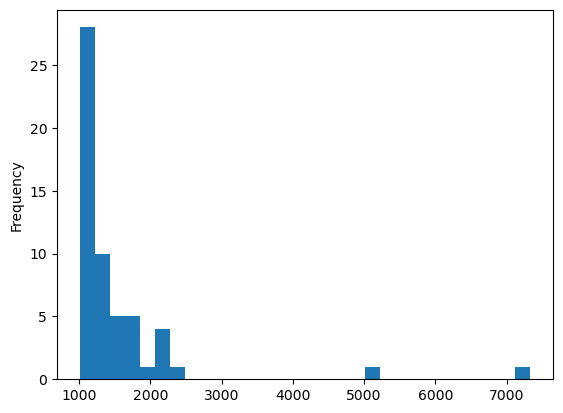

In [31]:
high_score['score'].plot.hist(bins=30)
#this makes sense for the distribution to be skewed becuase the data frame contains all rows where the score
#is greater than 1,000.


In [32]:
#It appears we have a few outliers. I would like to see what those are. 
high_score[high_score['score'] > 5000]

,title,link,author,n_comments,score,text
6,This is flat farmland in Eastern Colorado with...,/r/Colorado/comments/10sjjaa/this_is_flat_farm...,overList830,97,5081,
48,"5 people are killed, at least 18 injured in a ...",/r/Colorado/comments/z00xxn/5_people_are_kille...,cityb0t,965,7333,


<AxesSubplot:xlabel='score', ylabel='n_comments'>

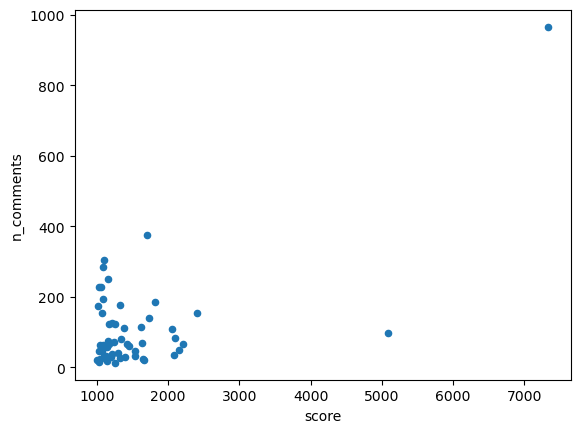

In [33]:
high_score.plot.scatter(x='score', y='n_comments')
#There does not seem to be much of a correlation, but it is more of a positive correlation than negative. 

<AxesSubplot:>

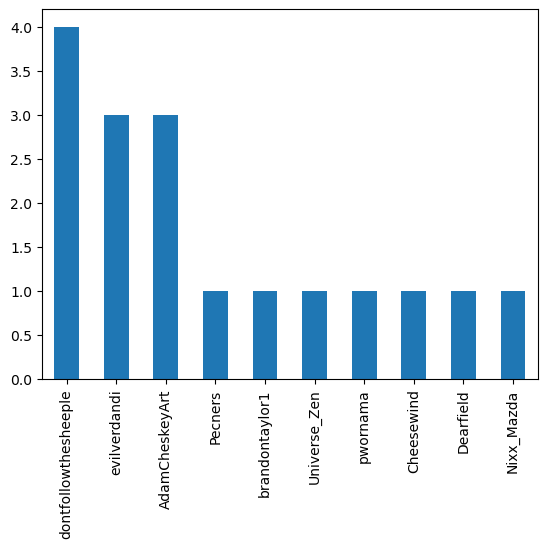

In [34]:
high_score['author'].value_counts()[:10].plot.bar()

<AxesSubplot:xlabel='score', ylabel='n_comments'>

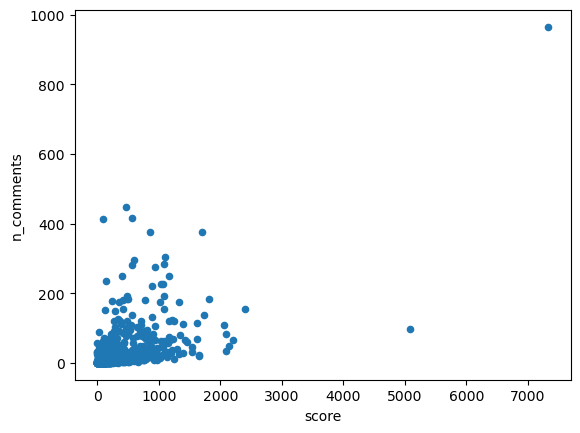

In [45]:
colo_df.plot.scatter(x='score', y='n_comments')

<AxesSubplot:ylabel='Frequency'>

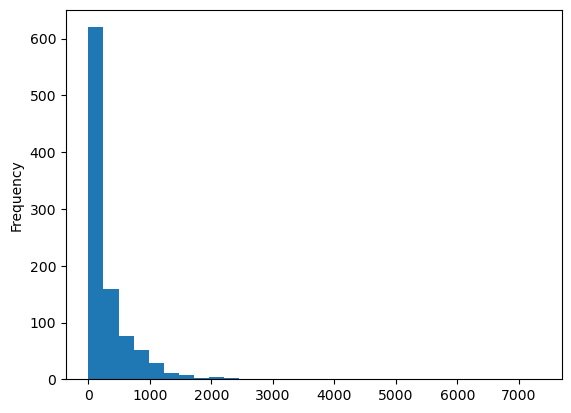

In [46]:
colo_df['score'].plot.hist(bins=30)

In [36]:
high_score.to_sql('theposts',con, if_exists='replace',index = False)# reading all rows


56

In [37]:
user_with_highest_counts = pd.read_sql_query('SELECT * FROM theposts WHERE author = "dontfollowthesheeple"', con)
user_with_highest_counts


,title,link,author,n_comments,score,text
0,Another Colorado hospital stops letting women ...,/r/Colorado/comments/10py5it/another_colorado_...,dontfollowthesheeple,251,1158,
1,2 handguns stolen outside Colorado Capitol fro...,/r/Colorado/comments/106jp8j/2_handguns_stolen...,dontfollowthesheeple,228,1036,
2,"As customers report huge jumps in bills, Excel...",/r/Colorado/comments/102bmtb/as_customers_repo...,dontfollowthesheeple,227,1061,
3,Let's call it what it is - corporate profits -...,/r/Colorado/comments/z6x9x8/lets_call_it_what_...,dontfollowthesheeple,155,1078,


In [38]:
#import a library title TextBlob to use to figure out the polarity (positive or negative sentiment) and
#subjectivity.
from textblob import TextBlob

tb = TextBlob("2 handguns stolen outside Colorado Capitol fro...")
tb.sentiment
#the polarity is 0, which is not accurate. Anything "stolen" should have a negative sentiment. 

Sentiment(polarity=0.0, subjectivity=0.05)

In [39]:
#I will use the above and apply it to the entire dataframe
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]
high_score['title_sentiment'] = high_score['title'].apply(get_tb_sentiment)


<AxesSubplot:ylabel='Frequency'>

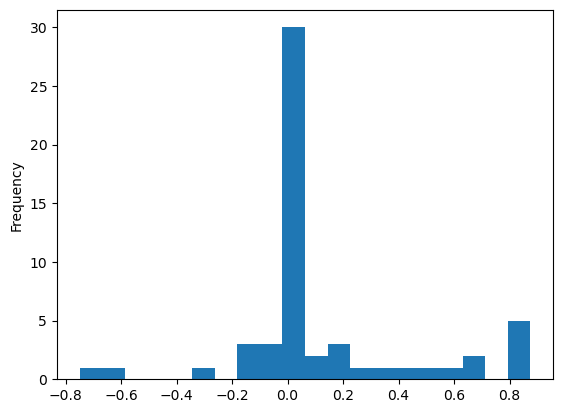

In [40]:
high_score['title_sentiment'].plot.hist(bins=20)
#It seems the sentiment has been 0, so not positive or negative. 

In [41]:
high_score['title_sentiment'].describe()

count    56.000000
mean      0.111246
std       0.326163
min      -0.750000
25%       0.000000
50%       0.000000
75%       0.159801
max       0.875000
Name: title_sentiment, dtype: float64

In [42]:
#sort the dataframe by the polarity values 
high_score.sort_values(by='title_sentiment')[['title', 'title_sentiment']]

,title,title_sentiment
9,"Who cares how cold it is, go for that hike any...",-0.750000
31,Arctic Cold Front Just Slammed Through Denver ...,-0.600000
6,This is flat farmland in Eastern Colorado with...,-0.312500
46,Meet the Man Who Took Down the Club Q Gunman,-0.155556
27,"Psilocybin, other psychedelics, officially dec...",-0.125000
7,Saw a few moose outside the condo I rented in ...,-0.100000
4,'I stood naked with my shotgun.' Black rancher...,-0.055556
53,"November 11th, 1979, Robin Williams joined the...",-0.042424
48,"5 people are killed, at least 18 injured in a ...",-0.027778
32,Colorado Topographical Flag,0.000000


In [43]:
#Prints the most negative title. Cold cou
high_score.sort_values(by='title_sentiment')['title'].to_list()[:1]

['Who cares how cold it is, go for that hike anyways!']

In [44]:
#Prints the most positive title.This looks correct because the word 'beautiful' it will influence polarity.
high_score.sort_values(by='title_sentiment', ascending=False)['title'].to_list()[:2]

['Good morning Colorado! Anyone know what this phenomenon is called?',
 'Beautiful drive today.']